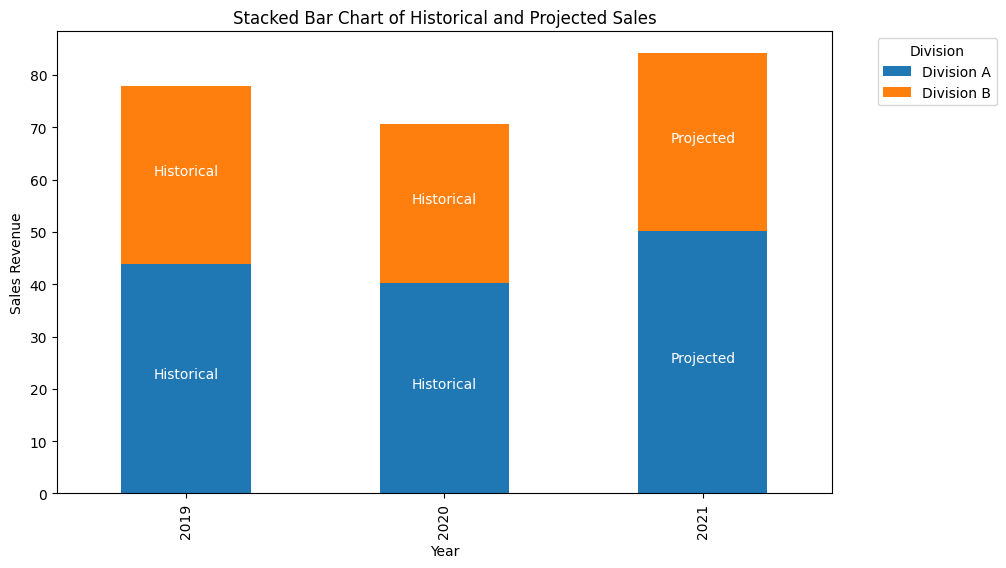

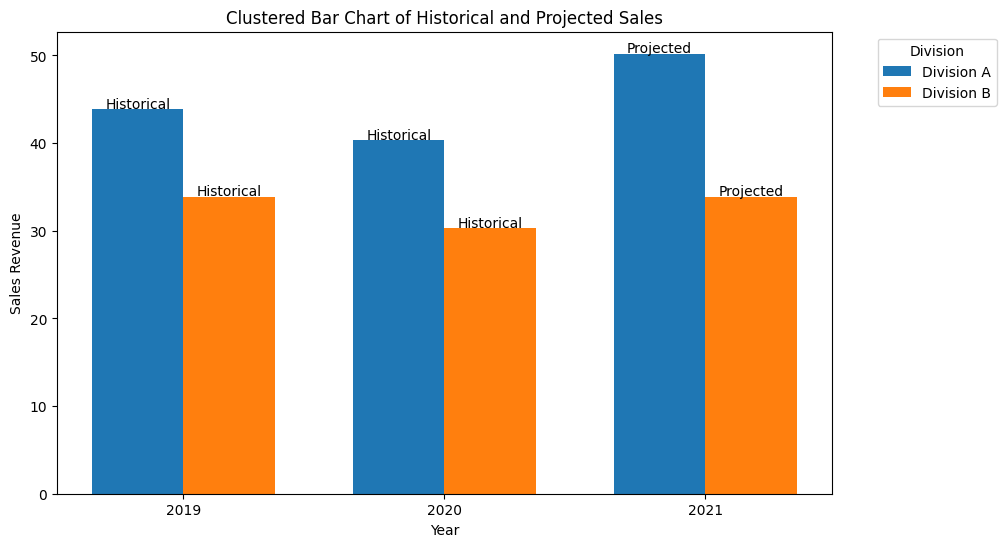

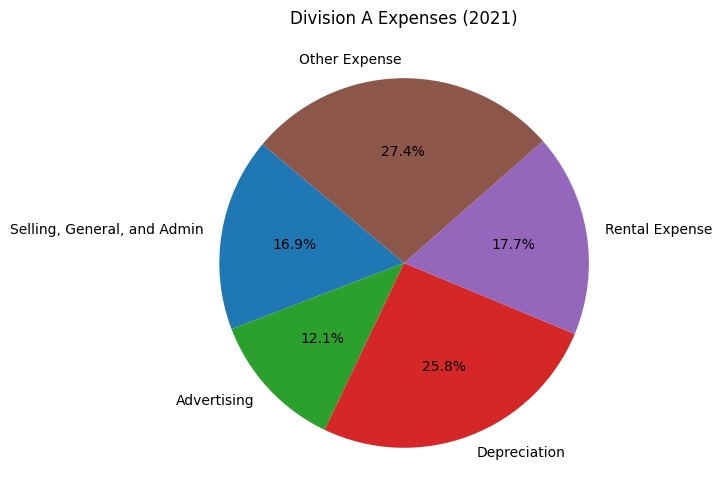

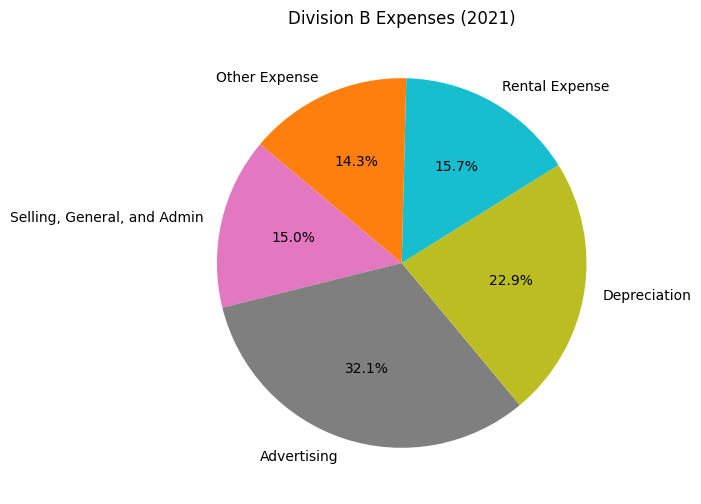

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV files
div_a = pd.read_csv('diva-incstmt.csv')
div_b = pd.read_csv('divb-incstmt.csv')

# Filter relevant rows
div_a_sales = div_a[div_a['Description'] == 'Sales Revenue'][['Description', 'Act2019', 'Act2020', 'Proj2021']].set_index('Description')
div_b_sales = div_b[div_b['Description'] == 'Sales Revenue'][['Description', 'Act2019', 'Act2020', 'Proj2021']].set_index('Description')

# Combine sales data for visualization
sales_data = pd.DataFrame({
    'Year': ['2019', '2020', '2021'],
    'Division A': div_a_sales.values.flatten(),
    'Division B': div_b_sales.values.flatten()
}).set_index('Year')

# Define distinct colors for each division
colors = ['#1f77b4', '#ff7f0e']

# Stacked Bar Chart
ax = sales_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Stacked Bar Chart of Historical and Projected Sales')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')

# Add annotations for "Historical Sales" and "Projected Sales"
for i, year in enumerate(sales_data.index):
    # Historical sales (2019, 2020)
    if year in ['2019', '2020']:
        plt.text(i, sales_data.loc[year, 'Division A'] / 2, 'Historical', color='white', ha='center', fontsize=10)
        plt.text(i, sales_data.loc[year, 'Division A'] + sales_data.loc[year, 'Division B'] / 2,
                 'Historical', color='white', ha='center', fontsize=10)
    # Projected sales (2021)
    else:
        plt.text(i, sales_data.loc[year, 'Division A'] / 2, 'Projected', color='white', ha='center', fontsize=10)
        plt.text(i, sales_data.loc[year, 'Division A'] + sales_data.loc[year, 'Division B'] / 2,
                 'Projected', color='white', ha='center', fontsize=10)

plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('stacked_bar_chart_with_titles.png')
plt.show()

# Clustered Bar Chart
bar_width = 0.35
years = np.arange(len(sales_data.index))
plt.figure(figsize=(10, 6))

# Plot Division A
plt.bar(years - bar_width / 2, sales_data['Division A'], width=bar_width, color=colors[0], label='Division A')
# Plot Division B
plt.bar(years + bar_width / 2, sales_data['Division B'], width=bar_width, color=colors[1], label='Division B')

# Add annotations for "Historical Sales" and "Projected Sales"
for i, year in enumerate(sales_data.index):
    if year in ['2019', '2020']:
        plt.text(i - bar_width / 2, sales_data.loc[year, 'Division A'] + 0.1, 'Historical', ha='center', fontsize=10)
        plt.text(i + bar_width / 2, sales_data.loc[year, 'Division B'] + 0.1, 'Historical', ha='center', fontsize=10)
    else:
        plt.text(i - bar_width / 2, sales_data.loc[year, 'Division A'] + 0.1, 'Projected', ha='center', fontsize=10)
        plt.text(i + bar_width / 2, sales_data.loc[year, 'Division B'] + 0.1, 'Projected', ha='center', fontsize=10)

# Add labels and legend
plt.title('Clustered Bar Chart of Historical and Projected Sales')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.xticks(years, sales_data.index)
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('clustered_bar_chart_with_titles.png')
plt.show()

# Pie Charts for 2021 Expenses
# Filter expense categories
expense_categories = ['Selling, General, and Admin', 'Advertising', 'Depreciation', 'Rental Expense', 'Other Expense']

div_a_expenses = div_a[div_a['Description'].isin(expense_categories)][['Description', 'Proj2021']]
div_b_expenses = div_b[div_b['Description'].isin(expense_categories)][['Description', 'Proj2021']]

# Pie chart for Division A
plt.figure(figsize=(6, 6))
plt.pie(div_a_expenses['Proj2021'], labels=div_a_expenses['Description'], autopct='%1.1f%%', startangle=140,
        colors=['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Division A Expenses (2021)')
plt.savefig('div_a_expenses_pie_chart.png')
plt.show()

# Pie chart for Division B
plt.figure(figsize=(6, 6))
plt.pie(div_b_expenses['Proj2021'], labels=div_b_expenses['Description'], autopct='%1.1f%%', startangle=140,
        colors=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e'])
plt.title('Division B Expenses (2021)')
plt.savefig('div_b_expenses_pie_chart.png')
plt.show()